''This notebook performs preprocessing and TF-IDF-based feature extraction on a text dataset, followed by data visualization using WordCloud. 
The project demonstrates how text can be transformed into meaningful features for future classification tasks.''

In [1]:
import re 
import nltk
import pandas as pd
import numpy as np

In [7]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 3.6 MB/s eta 0:00:00


In [6]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\K.V.N\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\K.V.N\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\K.V.N\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\K.V.N\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
#stemming and lematizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [5]:
from tqdm import tqdm

In [ ]:
!pip install wordcloud

In [4]:
from wordcloud import WordCloud
import re 
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

In [87]:
sw = stopwords.words('english')

In [101]:
spam = pd.read_csv('Data_sets/spam_or_ham/completeSpamAssassin.csv')

In [102]:
spam = spam.rename(columns={'Unnamed: 0' : 'S.no'})

In [103]:
spam.head()

,S.no,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [104]:
spam.describe()

,S.no,Label
count,6046.000000,6046.000000
mean,3022.500000,0.313596
std,1745.474195,0.463993
min,0.000000,0.000000
25%,1511.250000,0.000000
50%,3022.500000,0.000000
75%,4533.750000,1.000000
max,6045.000000,1.000000


In [105]:
spam.loc[247]

S.no       247
Body     empty
Label        1
Name: 247, dtype: object

In [106]:
spam.dropna()

,S.no,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1
...,...,...,...
6041,6041,empty,0
6042,6042,___ ___ ...,0
6043,6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,6044,empty,0


In [107]:
spam['Body']

0       \nSave up to 70% on Life Insurance.\nWhy Spend...
1       1) Fight The Risk of Cancer!\nhttp://www.adcli...
2       1) Fight The Risk of Cancer!\nhttp://www.adcli...
3       ##############################################...
4       I thought you might like these:\n1) Slim Down ...
                              ...                        
6041                                                empty
6042                      ___           ___           ...
6043    IN THIS ISSUE:01. Readers write\n02. Extension...
6044                                                empty
6045                                                empty
Name: Body, Length: 6046, dtype: object

In [108]:
spam=spam[spam['Body'].notnull()]

In [115]:
spam['Body'] = spam['Body'].apply(lambda x:re.sub(r'[^A-z0-9 ]','',x))
spam['Body'] = spam['Body'].apply(lambda x:re.sub(r'_','',x))
spam['Body'] = spam['Body'].apply(lambda x:re.sub(r'\s+',' ',x))
spam['Body'] = spam['Body'].apply(lambda x:re.sub(r'\+','',x))

In [116]:
#spam['Body'] = spam['Body'].apply(lambda x:([word for word in x.split() if word not in sw ]))

In [117]:
spam

,S.no,Body,Label
0,0,Save up to 70 on Life InsuranceWhy Spend More ...,1
1,1,1 Fight The Risk of Cancerhttpwwwadclickwspcfm...,1
2,2,1 Fight The Risk of Cancerhttpwwwadclickwspcfm...,1
3,3,Adult Club Offers FREE Membership INSTANT ACC...,1
4,4,I thought you might like these1 Slim Down Guar...,1
...,...,...,...
6041,6041,empty,0
6042,6042,\ \ \ \ \ \ \ \ \\ \ \ \ \\ \ \ \\ \ \\ \ \\ ...,0
6043,6043,IN THIS ISSUE01 Readers write02 Extension sear...,0
6044,6044,empty,0


In [118]:
E = ['empty']
#spam = spam.spam['Body'] == 'empty'
spam = spam[spam.Body.isin(E) == False]
spam.dropna()

,S.no,Body,Label
0,0,Save up to 70 on Life InsuranceWhy Spend More ...,1
1,1,1 Fight The Risk of Cancerhttpwwwadclickwspcfm...,1
2,2,1 Fight The Risk of Cancerhttpwwwadclickwspcfm...,1
3,3,Adult Club Offers FREE Membership INSTANT ACC...,1
4,4,I thought you might like these1 Slim Down Guar...,1
...,...,...,...
6033,6033,1 iSiloTM 325 for Palm OS Pocket PC and Window...,0
6034,6034,EFFector Vol 15 No 35 November 8 2002 reneffor...,0
6039,6039,We have extended our Free seat sale until Thur...,0
6042,6042,\ \ \ \ \ \ \ \ \\ \ \ \ \\ \ \ \\ \ \\ \ \\ ...,0


In [119]:
#spam_r = spam.reset_index(drop=True,inplace=True)
spam.reset_index(drop=True)

,S.no,Body,Label
0,0,Save up to 70 on Life InsuranceWhy Spend More ...,1
1,1,1 Fight The Risk of Cancerhttpwwwadclickwspcfm...,1
2,2,1 Fight The Risk of Cancerhttpwwwadclickwspcfm...,1
3,3,Adult Club Offers FREE Membership INSTANT ACC...,1
4,4,I thought you might like these1 Slim Down Guar...,1
...,...,...,...
5507,6033,1 iSiloTM 325 for Palm OS Pocket PC and Window...,0
5508,6034,EFFector Vol 15 No 35 November 8 2002 reneffor...,0
5509,6039,We have extended our Free seat sale until Thur...,0
5510,6042,\ \ \ \ \ \ \ \ \\ \ \ \ \\ \ \ \\ \ \\ \ \\ ...,0


In [120]:
spam_T =spam[(spam.Label == 0)]
spam_F =spam[(spam.Label == 1)]

In [121]:
spam_T.head().reset_index(drop=True)

,S.no,Body,Label
0,1896,Date Wed 21 Aug 2002 105446 0500 From Chris G...,0
1,1897,Martin A postedTassos Papadopoulos the Greek s...,0
2,1898,Man Threatens Explosion In Moscow Thursday Aug...,0
3,1899,Klez The Virus That Wont Die Already the most ...,0
4,1900,in adding cream to spaghetti carbonara which ...,0


In [122]:
spam_F.head().reset_index(drop=True)

,S.no,Body,Label
0,0,Save up to 70 on Life InsuranceWhy Spend More ...,1
1,1,1 Fight The Risk of Cancerhttpwwwadclickwspcfm...,1
2,2,1 Fight The Risk of Cancerhttpwwwadclickwspcfm...,1
3,3,Adult Club Offers FREE Membership INSTANT ACC...,1
4,4,I thought you might like these1 Slim Down Guar...,1


In [123]:
spam_T.describe()

,S.no,Label
count,3952.000000,3952.0
mean,3951.787449,0.0
std,1187.186477,0.0
min,1896.000000,0.0
25%,2916.750000,0.0
50%,3963.500000,0.0
75%,4962.250000,0.0
max,6043.000000,0.0


In [124]:
spam_F.describe()

,S.no,Label
count,1560.000000,1560.0
mean,954.598077,1.0
std,546.033055,0.0
min,0.000000,1.0
25%,492.750000,1.0
50%,963.500000,1.0
75%,1424.250000,1.0
max,1895.000000,1.0


In [125]:
spam_F.value_counts('Body')

Body
Dear Homeowner 625 30 Yr Fixed Rate MortgageInterest rates are at their lowest point in 40 years We help you find the best rate for your situation by matching your needs with hundreds of lenders Home Improvement Refinance Second Mortgage Home Equity Loans and More Even with less than perfect credit Click Here for a Free QuoteLock In YOUR LOW FIXED RATE TODAY aNO COST OUT OF POCKET aNO OBLIGATION aFREE CONSULTATION aALL CREDIT GRADES ACCEPTED Rates as low as 625 wont stay this low forever CLICK HERE based on mortgage rate as of 51502 as low as 625 see lender for details HApply now and one of our lending partners will get back to you within 48 hoursCLICK HERETo Be Removed Please Clicking Here                                                                                                                                                                                                                                                                                                        

In [126]:
spam_T.value_counts('Body')

Body
URL httpwwwaskbjoernhansencomarchives20020924htmlDate 20020924T0235590800You are not still using sourceforge are you If you have any hopes that they are anything but yet another business giving away a free service then see this Selling Microsoft VisualStudio on the open source development platform Nice touch Click on the image for the original screenshot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [127]:
M = spam_T.Body.apply(lambda x: pd.value_counts([word for word in x.split(" ") if word not in sw])).sum(axis = 0)


In [128]:
dict(M)

{'pick': 96.0,
 'rbrace': 6.0,
 'lbrace': 6.0,
 'I': 8607.0,
 'sequence': 72.0,
 'delta': 14.0,
 'command': 159.0,
 '1': 738.0,
 '48524852': 3.0,
 'ftp': 35.0,
 'subject': 257.0,
 'inbox': 44.0,
 'list': 1194.0,
 'version': 488.0,
 'comes': 178.0,
 'mhprofile': 2.0,
 'exec': 19.0,
 'theone': 4.0,
 'ICT': 1.0,
 'thinkExmhworkers': 1.0,
 'sel': 3.0,
 'pickseq': 1.0,
 'mhparam': 1.0,
 'part': 367.0,
 'relevant': 73.0,
 '2002]And': 1.0,
 '145556': 1.0,
 'works': 350.0,
 '17': 82.0,
 'mailing': 1323.0,
 'Mar': 1.0,
 'Sun': 190.0,
 'fuchsiacsmuOZAU': 1.0,
 '[compiled': 1.0,
 'nmh104': 1.0,
 'versionpick': 1.0,
 'Imusing': 1.0,
 'listSince': 1.0,
 'haventbeen': 1.0,
 'actually': 392.0,
 'line': 533.0,
 'day': 335.0,
 'form': 182.0,
 'code': 532.0,
 'using': 878.0,
 'still': 729.0,
 'createdkreps': 1.0,
 'get': 1632.0,
 'popup': 30.0,
 'search': 168.0,
 'able': 305.0,
 'ago': 248.0,
 'explicit': 13.0,
 'thats': 416.0,
 'reach': 74.0,
 'nmh': 22.0,
 'cvs': 59.0,
 'repository': 81.0,
 'today': 2

In [129]:
SST = sorted(M.items(), key=lambda x: x[1],reverse=True)
Truspm = SST
Truspm

[('I', 8607.0),
 ('The', 3560.0),
 ('2002', 2076.0),
 ('one', 1961.0),
 ('would', 1796.0),
 ('use', 1729.0),
 ('like', 1683.0),
 ('get', 1632.0),
 ('email', 1548.0),
 ('new', 1522.0),
 ('wrote', 1421.0),
 ('dont', 1409.0),
 ('time', 1352.0),
 ('Linux', 1340.0),
 ('mailing', 1323.0),
 ('people', 1252.0),
 ('Im', 1206.0),
 ('list', 1194.0),
 ('This', 1185.0),
 ('It', 1085.0),
 ('also', 1064.0),
 ('said', 1056.0),
 ('On', 1052.0),
 ('could', 1021.0),
 ('If', 1014.0),
 ('way', 1008.0),
 ('know', 978.0),
 ('make', 976.0),
 ('think', 971.0),
 ('work', 929.0),
 ('using', 878.0),
 ('even', 859.0),
 ('see', 843.0),
 ('A', 835.0),
 ('may', 831.0),
 ('file', 829.0),
 ('In', 809.0),
 ('much', 781.0),
 ('want', 780.0),
 ('', 777.0),
 ('first', 774.0),
 ('need', 773.0),
 ('message', 771.0),
 ('Group', 767.0),
 ('You', 744.0),
 ('1', 738.0),
 ('still', 729.0),
 ('good', 717.0),
 ('spam', 717.0),
 ('URL', 715.0),
 ('system', 708.0),
 ('Irish', 701.0),
 ('But', 699.0),
 ('many', 694.0),
 ('Ive', 685.0)

In [130]:
T = []
for i in Truspm:
    T.append(i[0])

In [131]:
T

['I',
 'The',
 '2002',
 'one',
 'would',
 'use',
 'like',
 'get',
 'email',
 'new',
 'wrote',
 'dont',
 'time',
 'Linux',
 'mailing',
 'people',
 'Im',
 'list',
 'This',
 'It',
 'also',
 'said',
 'On',
 'could',
 'If',
 'way',
 'know',
 'make',
 'think',
 'work',
 'using',
 'even',
 'see',
 'A',
 'may',
 'file',
 'In',
 'much',
 'want',
 '',
 'first',
 'need',
 'message',
 'Group',
 'You',
 '1',
 'still',
 'good',
 'spam',
 'URL',
 'system',
 'Irish',
 'But',
 'many',
 'Ive',
 'well',
 'Users',
 'used',
 'maintainer',
 'mail',
 'really',
 'go',
 'years',
 'listmasterlinuxie',
 'unsubscription',
 'problem',
 'To',
 'something',
 'set',
 'files',
 'find',
 'informationList',
 'Windows',
 'two',
 'say',
 'Web',
 'server',
 'change',
 'iluglinuxiehttpwwwlinuxiemailmanlistinfoilug',
 'software',
 'since',
 'back',
 'take',
 'right',
 'doesnt',
 'information',
 'might',
 'And',
 'line',
 'code',
 '2',
 'We',
 'Internet',
 'run',
 'cant',
 'data',
 'better',
 'going',
 'From',
 'things',
 'go

In [132]:
L = spam_F.Body.apply(lambda x: pd.value_counts([word for word in x.split(" ") if word not in sw])).sum(axis = 0)


In [133]:
dict(L)

{'insurance': 109.0,
 'Life': 78.0,
 'Savings': 8.0,
 'email': 2026.0,
 'Quote': 34.0,
 'SAVE': 28.0,
 'best': 298.0,
 'FREE': 793.0,
 'You': 878.0,
 '70': 71.0,
 'The': 1290.0,
 'Click': 488.0,
 'Free': 382.0,
 'Your': 531.0,
 'For': 405.0,
 'Here': 308.0,
 'QuoteProtecting': 1.0,
 'Save': 129.0,
 'Shop': 7.0,
 'types': 15.0,
 'compare': 38.0,
 'investment': 189.0,
 'complete': 168.0,
 'minutes': 131.0,
 '5': 505.0,
 'less': 164.0,
 'take': 254.0,
 'service': 306.0,
 'Our': 268.0,
 'family': 148.0,
 'receipt': 38.0,
 'youll': 107.0,
 'ever': 202.0,
 'please': 707.0,
 'solicitations': 3.0,
 'prohibits': 4.0,
 'state': 153.0,
 'reside': 3.0,
 'If': 824.0,
 'REMOVE': 113.0,
 'TYPE': 11.0,
 'AND': 349.0,
 'HERE': 286.0,
 'CLICK': 233.0,
 'PLEASE': 44.0,
 'list': 753.0,
 'removed': 460.0,
 'wish': 334.0,
 'andor': 28.0,
 'error': 136.0,
 'quote': 37.0,
 'makeIf': 3.0,
 'Lifequote': 1.0,
 'hundreds': 130.0,
 'requesting': 35.0,
 'security': 107.0,
 'Provide': 14.0,
 'We': 926.0,
 'affordabl

In [134]:
SSF = sorted(L.items(), key=lambda x: x[1],reverse=True)
flspm = SSF
flspm

[('I', 2719.0),
 ('email', 2026.0),
 ('The', 1290.0),
 ('get', 975.0),
 ('We', 926.0),
 ('money', 884.0),
 ('people', 881.0),
 ('one', 879.0),
 ('You', 878.0),
 ('If', 824.0),
 ('business', 820.0),
 ('This', 807.0),
 ('FREE', 793.0),
 ('A', 783.0),
 ('list', 753.0),
 ('time', 736.0),
 ('information', 719.0),
 ('please', 707.0),
 ('send', 705.0),
 ('1', 679.0),
 ('us', 644.0),
 ('receive', 639.0),
 ('address', 637.0),
 ('To', 636.0),
 ('make', 634.0),
 ('TO', 614.0),
 ('free', 589.0),
 ('2', 576.0),
 ('3', 570.0),
 ('like', 562.0),
 ('THE', 560.0),
 ('YOU', 551.0),
 ('Your', 531.0),
 ('YOUR', 526.0),
 ('5', 505.0),
 ('may', 501.0),
 ('click', 500.0),
 ('would', 491.0),
 ('new', 489.0),
 ('Click', 488.0),
 ('US', 475.0),
 ('name', 469.0),
 ('use', 462.0),
 ('removed', 460.0),
 ('Email', 454.0),
 ('program', 453.0),
 ('want', 447.0),
 ('OF', 436.0),
 ('home', 423.0),
 ('mailing', 422.0),
 ('work', 421.0),
 ('It', 412.0),
 ('100', 410.0),
 ('For', 405.0),
 ('need', 405.0),
 ('help', 389.0)

In [135]:
F = []
for i in flspm:
    F.append(i[0])

In [136]:
F

['I',
 'email',
 'The',
 'get',
 'We',
 'money',
 'people',
 'one',
 'You',
 'If',
 'business',
 'This',
 'FREE',
 'A',
 'list',
 'time',
 'information',
 'please',
 'send',
 '1',
 'us',
 'receive',
 'address',
 'To',
 'make',
 'TO',
 'free',
 '2',
 '3',
 'like',
 'THE',
 'YOU',
 'Your',
 'YOUR',
 '5',
 'may',
 'click',
 'would',
 'new',
 'Click',
 'US',
 'name',
 'use',
 'removed',
 'Email',
 'program',
 'want',
 'OF',
 'home',
 'mailing',
 'work',
 'It',
 '100',
 'For',
 'need',
 'help',
 'order',
 'Free',
 'know',
 'Internet',
 'emails',
 'credit',
 'also',
 'message',
 'company',
 'much',
 'made',
 'AND',
 'offer',
 'within',
 'NOT',
 'future',
 'even',
 'wish',
 'received',
 'addresses',
 'per',
 '4',
 'No',
 'remove',
 'FOR',
 '',
 'day',
 'first',
 'Here',
 'form',
 'find',
 'service',
 'many',
 'years',
 'site',
 'best',
 'subject',
 'see',
 'dont',
 'Please',
 'days',
 'government',
 'million',
 'every',
 'IS',
 'HERE',
 'contact',
 'product',
 'link',
 'online',
 'mail',
 'TH

In [137]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [138]:
spam_words = " ".join(T)
not_spam_words = " ".join(F)

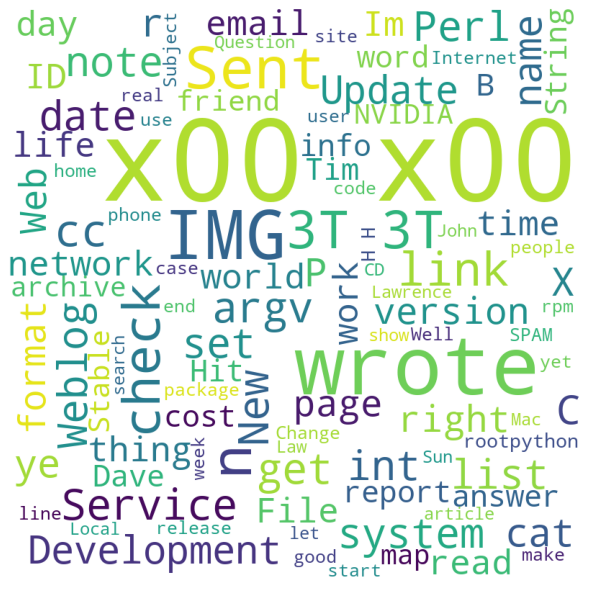

In [139]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                      max_words = 100,
                      stopwords = sw,
                min_font_size = 10).generate(spam_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

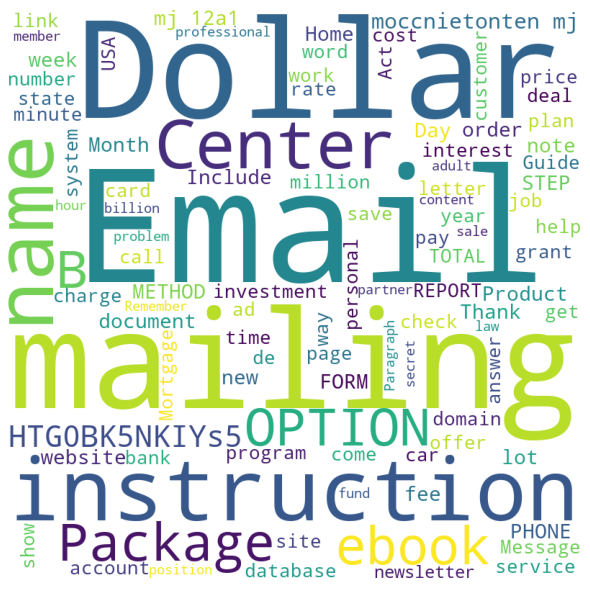

In [140]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                      max_words = 100,
                      stopwords = sw,
                min_font_size = 10).generate(not_spam_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()